In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from collections import Counter
from sklearn.metrics import (
     accuracy_score,
     auc,
     average_precision_score,
     balanced_accuracy_score,
     confusion_matrix,
     matthews_corrcoef,
     precision_score,
     roc_curve,
 )
import seaborn as sns
import numpy as np

In [2]:
def calculate_metrics_probas(predictions, labels, theta):
    fpr, tpr, thresholds = roc_curve(labels, predictions)
    roc_auc = auc(fpr, tpr)
    binary_predictions = [p > theta for p in predictions]
    accuracy = accuracy_score(labels, binary_predictions)
    tn, fp, fn, tp = confusion_matrix(labels,
                                    binary_predictions).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return roc_auc, sensitivity, specificity, accuracy

In [3]:
k=11
theta = 0.75
setting1 = "1"
setting2 = "3"
setting3 = "9"
datafolder = ""
basefolder = ""
plotsfolder = 'plots'
start_id=1000
nr_samples = 500

In [9]:
metricsA = []
metricsA_r = []
for i in range(nr_samples):
    run_id = start_id+i
    for fold in range(5):
        filename = os.path.join(datafolder,"clustering"+setting1, str(start_id+i)+'_'+str(fold)+'_k'+str(k)+'_predictions.csv')
        try:
            predictions = pd.read_csv(filename)
            if len(predictions) >= 0:
                roc_auc, sensitivity, specificity, accuracy = calculate_metrics_probas(predictions['predictions'], predictions['labels'], theta)
                metricsA.append([start_id+i, fold, roc_auc, sensitivity, specificity, accuracy])
            else:
                #print(filename)
                continue

        except:
            #print(filename)
            continue
        
        filename = os.path.join(datafolder,"clustering"+setting1+"_r", str(start_id+i)+'_'+str(fold)+'_k'+str(k)+'_predictions.csv')
        try:
            predictions = pd.read_csv(filename)
            if len(predictions) >= 0:
                roc_auc, sensitivity, specificity, accuracy = calculate_metrics_probas(predictions['predictions'], predictions['labels'], theta)
                metricsA_r.append([start_id+i, fold, roc_auc, sensitivity, specificity, accuracy])
            else:
                #print(filename)
                continue

        except:
            #print(filename)
            continue
metricsA = pd.DataFrame(metricsA, columns=['id', 'fold', 'roc_auc', 'sensitivity', 'specificity', 'accuracy'])
metricsA_r = pd.DataFrame(metricsA_r, columns=['id', 'fold', 'roc_auc', 'sensitivity', 'specificity', 'accuracy'])


In [5]:
metricsB = []
metricsB_r = []
for i in range(nr_samples):
    run_id = start_id+i
    for fold in range(5):
        filename = os.path.join(datafolder,"clustering"+setting2, str(start_id+i)+'_'+str(fold)+'_k'+str(k)+'_predictions.csv')
        predictions = pd.read_csv(filename)
        roc_auc, sensitivity, specificity, accuracy = calculate_metrics_probas(predictions['predictions'], predictions['labels'], theta)
        metricsB.append([start_id+i, fold, roc_auc, sensitivity, specificity, accuracy])

        filename = os.path.join(datafolder,"clustering"+setting2+"_r", str(start_id+i)+'_'+str(fold)+'_k'+str(k)+'_predictions.csv')
        predictions = pd.read_csv(filename)
        roc_auc, sensitivity, specificity, accuracy = calculate_metrics_probas(predictions['predictions'], predictions['labels'], theta)
        metricsB_r.append([start_id+i, fold, roc_auc, sensitivity, specificity, accuracy])
metricsB = pd.DataFrame(metricsB, columns=['id', 'fold', 'roc_auc', 'sensitivity', 'specificity', 'accuracy'])
metricsB_r = pd.DataFrame(metricsB_r, columns=['id', 'fold', 'roc_auc', 'sensitivity', 'specificity', 'accuracy'])


In [6]:
metricsC = []
metricsC_r = []
for i in range(nr_samples):
    run_id = start_id+i
    for fold in range(5):
        filename = os.path.join(datafolder,"clustering"+setting3, str(start_id+i)+'_'+str(fold)+'_k'+str(k)+'_predictions.csv')
        try:
            predictions = pd.read_csv(filename)
            roc_auc, sensitivity, specificity, accuracy = calculate_metrics_probas(predictions['predictions'], predictions['labels'], theta)
            metricsC.append([start_id+i, fold, roc_auc, sensitivity, specificity, accuracy])

        except:
            #print(filename)
            continue
        
        filename = os.path.join(datafolder,"clustering"+setting3+"_r", str(start_id+i)+'_'+str(fold)+'_k'+str(k)+'_predictions.csv')
        predictions = pd.read_csv(filename)
        roc_auc, sensitivity, specificity, accuracy = calculate_metrics_probas(predictions['predictions'], predictions['labels'], theta)
        metricsC_r.append([start_id+i, fold, roc_auc, sensitivity, specificity, accuracy])
metricsC = pd.DataFrame(metricsC, columns=['id', 'fold', 'roc_auc', 'sensitivity', 'specificity', 'accuracy'])
metricsC_r = pd.DataFrame(metricsC_r, columns=['id', 'fold', 'roc_auc', 'sensitivity', 'specificity', 'accuracy'])


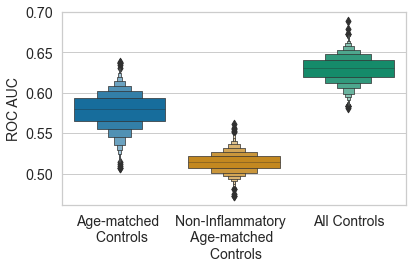

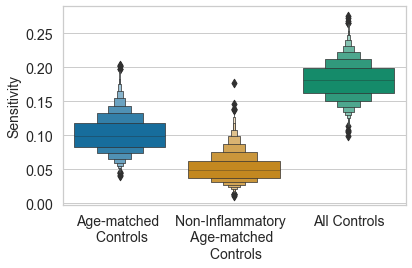

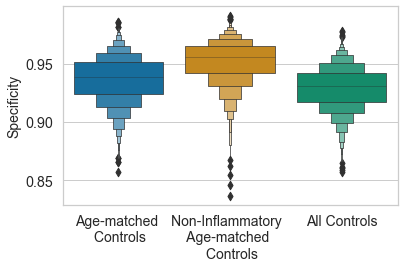

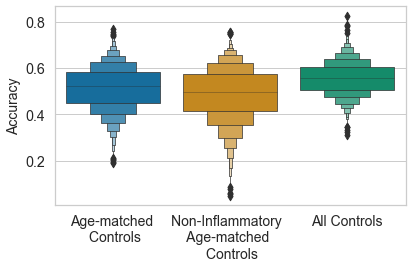

In [7]:
# Scores for all three data settings compared
sns.set_theme(style="whitegrid", palette="colorblind", font_scale=1.3)

plot_dict = {}
ylabels = ['ROC AUC', 'Sensitivity', 'Specificity', 'Accuracy']
for i, metric in enumerate(['roc_auc', 'sensitivity', 'specificity', 'accuracy']):
    plot_dict['Age-matched \n Controls'] = metricsA[metric]
    plot_dict['Non-Inflammatory  \n Age-matched  \n Controls'] = metricsB[metric]
    plot_dict['All Controls'] = metricsC[metric]
       
    fig, ax = plt.subplots(1, 1)
    labels, data = [*zip(*plot_dict.items())]
    splot2 = sns.boxenplot(data=data, ax=ax, width=0.8, linewidth = 0.7)
    ax.set_xticklabels(labels, fontsize=14)
    ax.set_ylabel(ylabels[i], fontsize=14)
    plt.tight_layout()
    plt.savefig(os.path.join(basefolder, plotsfolder, metric+'_setting_comparison.pdf'))

In [ ]:
print('Accuracy')
print('regular', np.mean(metricsA['accuracy']), np.std(metricsA['accuracy']))
print('No PMH/AA', np.mean(metricsB['accuracy']), np.std(metricsB['accuracy']))
print('Not Agematched', np.mean(metricsC['accuracy']), np.std(metricsC['accuracy']))
print('Sensitivity')
print('regular', np.mean(metricsA['sensitivity']), np.std(metricsA['sensitivity']))
print('No PMH/AA', np.mean(metricsB['sensitivity']), np.std(metricsB['sensitivity']))
print('Not Agematched', np.mean(metricsC['sensitivity']), np.std(metricsC['sensitivity']))
print('Sepcificity')
print('regular', np.mean(metricsA['specificity']), np.std(metricsA['specificity']))
print('No PMH/AA', np.mean(metricsB['specificity']), np.std(metricsB['specificity']))
print('Not Agematched', np.mean(metricsC['specificity']), np.std(metricsC['specificity']))

Accuracy
regular 0.514369141755 0.09549756434182986
No PMH/AA 0.4889155582651666 0.1158254485607236
Not Agematched 0.5568061942814525 0.07187582748842923
Sensitivity
regular 0.1018879033461485 0.02569766100180871
No PMH/AA 0.051992592156212915 0.020467115516893206
Not Agematched 0.18144334409751214 0.026529817791198604
Sepcificity
regular 0.9370393179097333 0.020269534923340625
No PMH/AA 0.9522171832751308 0.018937641321875063
Not Agematched 0.92941178253363 0.018928840453137454


In [10]:
metricsA_diff = pd.DataFrame()
for metric in ['roc_auc', 'sensitivity', 'specificity', 'accuracy']:
    metricsA_diff[metric] = metricsA[metric]-metricsA_r[metric]

metricsB_diff = pd.DataFrame()
for metric in ['roc_auc', 'sensitivity', 'specificity', 'accuracy']:
    metricsB_diff[metric] = metricsB[metric]-metricsB_r[metric]

metricsC_diff = pd.DataFrame()
for metric in ['roc_auc', 'sensitivity', 'specificity', 'accuracy']:
    metricsC_diff[metric] = metricsC[metric]-metricsC_r[metric]

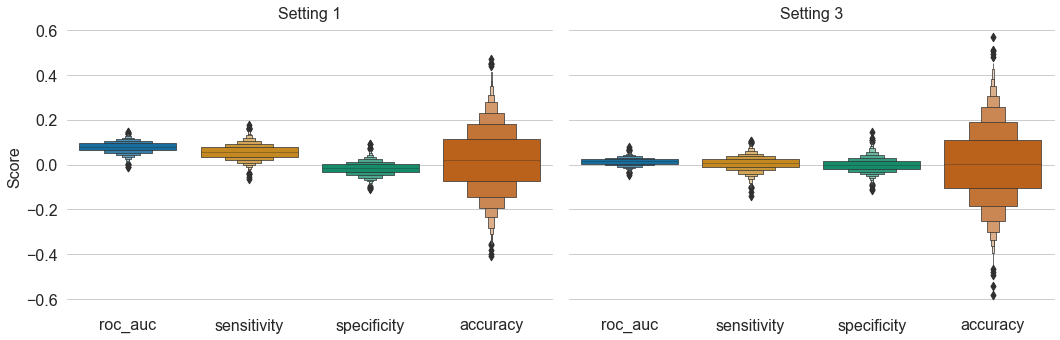

In [11]:
# Relative Metrics Comparison
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5))
plot_metrics=['roc_auc', 'sensitivity', 'specificity', 'accuracy']
splot1 = sns.boxenplot(data=metricsA_diff[plot_metrics], ax=ax[0], width=0.8, linewidth = 0.7) 
splot1.yaxis.grid(True, clip_on=False)     
splot2 = sns.boxenplot(data=metricsB_diff[plot_metrics], ax=ax[1], width=0.8, linewidth = 0.7)
splot2.yaxis.grid(True, clip_on=False)  
ax[0].set_ylabel('Score', fontsize=16)
ax[0].set_title('Setting '+setting1, fontsize=16)
ax[1].set_title('Setting '+setting2, fontsize=16)
ax[0].tick_params(labelsize=16)
ax[1].tick_params(labelsize=16)                                                  
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig(os.path.join(basefolder, plotsfolder, 'clustering_metrics_comp_rel_'+setting1+'_'+setting2+'.pdf'))